0.0952553985833967
0.0051403168329254905


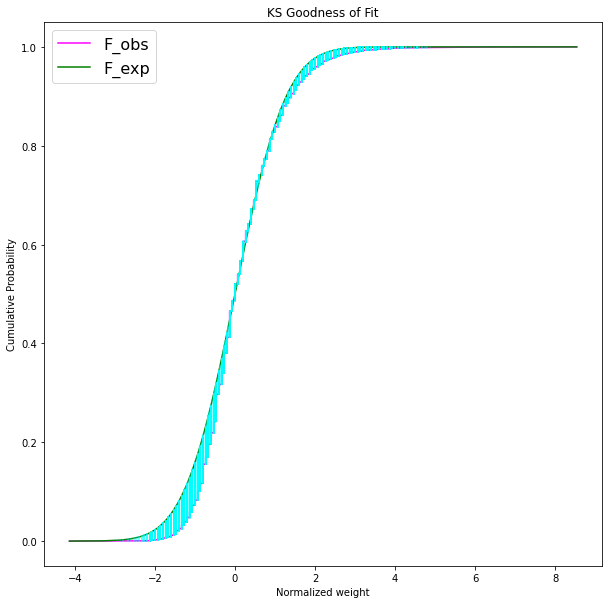

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

weight_data=pd.read_csv('/weightdata.txt', header = None, names = ["W"])
weight_data = weight_data["W"]

 #Finding CDF
weight_data_sorted = np.sort(weight_data)
weight_data_sorted = weight_data_sorted[~np.isnan (weight_data_sorted)]
weight_data_sorted_normal = (weight_data_sorted- 72)/15
cdf_null_hyp = [st.norm.cdf(weight) for weight in weight_data_sorted_normal]

 #Finding the observed test statistic
weight_data = weight_data[-np.isnan(weight_data)]
weight_edf = np.arange(1/len(weight_data), 1+1/len(weight_data), 1/len(weight_data))

#calculate absolute difference
weight_dif_abs = np.abs(cdf_null_hyp-weight_edf)
#get max different
dn_ks = max(weight_dif_abs)
print(dn_ks)

#Finding critical value of test statistic considering level of signifance as alpha = 0.05
dn_crit = 1.36/np. sqrt(len(weight_data))
print(dn_crit)

# Plotting the ECDF and CDF curves
plt.figure(figsize=(10, 10))
plt.plot(weight_data_sorted_normal, weight_edf, label='F_obs', color='magenta')
plt.plot(weight_data_sorted_normal, cdf_null_hyp, label='F_exp', color = 'green')
for x, yi, y2 in zip(weight_data_sorted_normal, weight_edf, cdf_null_hyp):
     plt.plot([x, x], [yi, y2], color='cyan',alpha = 0.2)
plt. legend(fontsize = 16)
plt.ylabel("Cumulative Probability")
plt.xlabel('Normalized weight')
plt.title("KS Goodness of Fit")
plt.show()
